---
 # **E**xploratory **D**ata **A**nalysis
--- ---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:
df = pd.read_csv("assets/cardio_train.csv", sep=";").drop(columns=["id"])
df["age_years"] = df["age"] // 365

print(df.shape)
df.head()

(70000, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


From Kaggle:
<br><br>
> Features:
<br>

&nbsp;&nbsp;&nbsp;&nbsp;1. **Age** | Objective Feature | **age** | int (days) <br>
&nbsp;&nbsp;&nbsp;&nbsp;2. **Height** | Objective Feature | **height** | int (cm) |<br>
&nbsp;&nbsp;&nbsp;&nbsp;3. **Weight** | Objective Feature | **weight** | float (kg) |<br>
&nbsp;&nbsp;&nbsp;&nbsp;4. **Gender** | Objective Feature | **gender** | categorical code |<br>
&nbsp;&nbsp;&nbsp;&nbsp;5. **Systolic blood pressure** | Examination Feature | **ap_hi** | int |<br>
&nbsp;&nbsp;&nbsp;&nbsp;6. **Diastolic blood pressure** | Examination Feature | **ap_lo** | int |<br>
&nbsp;&nbsp;&nbsp;&nbsp;7. **Cholesterol** | Examination Feature | cholesterol | **1**: normal, **2**: above normal, **3**: well above normal |<br>
&nbsp;&nbsp;&nbsp;&nbsp;8. **Glucose** | Examination Feature | **gluc** | 1: normal, 2: above normal, 3: well above normal |<br>
&nbsp;&nbsp;&nbsp;&nbsp;9. **Smoking** | Subjective Feature | **smoke** | binary |<br>
&nbsp;&nbsp;&nbsp;&nbsp;10. **Alcohol intake** | Subjective Feature | **alco** | binary |<br>
&nbsp;&nbsp;&nbsp;&nbsp;11. **Physical activity** | Subjective Feature | **active** | binary |<br>
&nbsp;&nbsp;&nbsp;&nbsp;12. **Presence or absence of cardiovascular disease** | Target Variable | **cardio** | binary |<br>
<br>

In regards to gender: 1 - women, 2 - men <br>
All of the dataset values were collected at the moment of medical examination. 

In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


### 1.1 a)

&nbsp; Q: How many datapoints are positive for cardiovascular disease, and how many are negative?

&nbsp; A: The dataset contains 70 000 records of patients data, 35 021 of those are recorded as negative for cardiovascular disease and 34 979 are recorded as positive for cardiovascular disease.

In [5]:
cardio_counts = df['cardio'].value_counts()
cardio_counts

cardio
0    35021
1    34979
Name: count, dtype: int64

## 1.1 b)

&nbsp; Q: What is the ratio for Cholesterol levels in the dataset?

&nbsp; A:The below ratios for Cholesterol levels in the dataset indicate that the majority of individuals have normal cholesterol levels.

In [6]:
cholesterol_counts = df["cholesterol"].value_counts()
cholesterol_ratios = cholesterol_counts / cholesterol_counts.sum()
cholesterol_ratios

cholesterol
1    0.748357
2    0.136414
3    0.115229
Name: count, dtype: float64

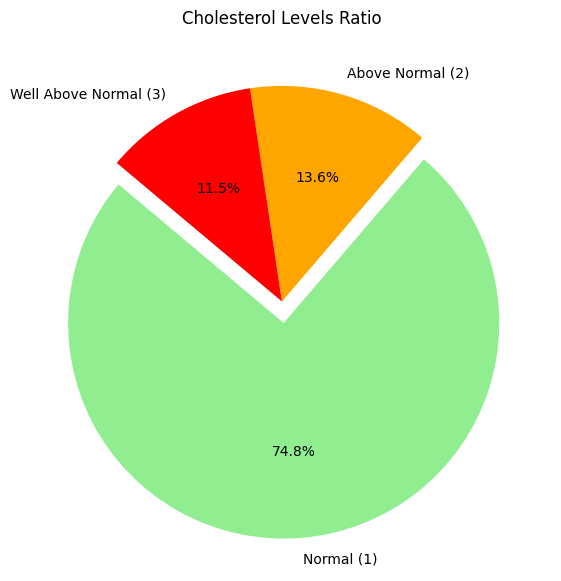

In [7]:
# Pie chart for choilesterol levels
labels = ["Normal (1)", "Above Normal (2)", "Well Above Normal (3)"]
sizes = cholesterol_ratios.values
colors = ["lightgreen", "orange", "red"]
explode = (0.1, 0, 0) # explode 1st slice (Normal)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%" , startangle = 140)
plt.title("Cholesterol Levels Ratio")
plt.show()

## 1.1 c)

&nbsp; Q: What is the age distribution of the dataset?

&nbsp; A: The histogram shown below suggests that the dataset primarily comprises of middle-aged adults, with a gradual decrease in population size among older age groups. This age distribution is crucial for analyzing cardiovascular disease as it is more prevalent in older age groups.

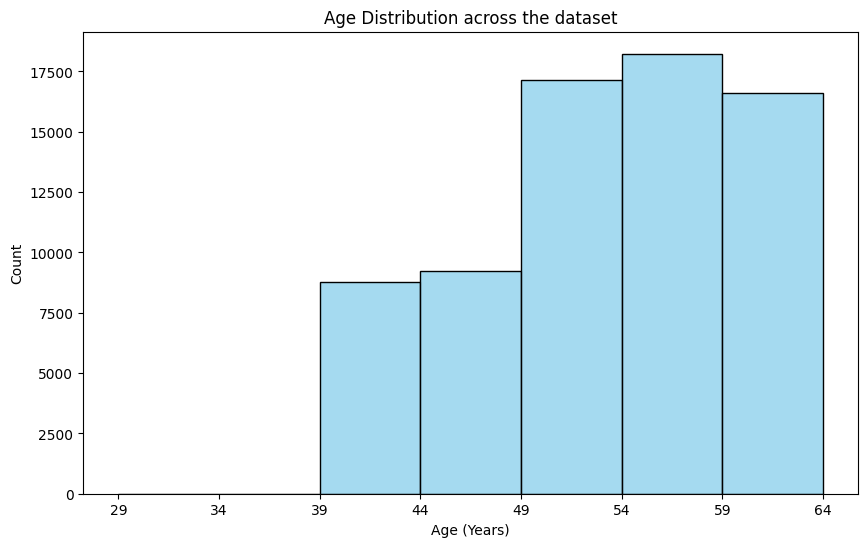

In [8]:

# defining custom bin edges
# sets interval to 5 years from min to max age plus an extra 5 years to include max age
bin_edges = np.arange(start=df['age_years'].min(), stop=df['age_years'].max() + 5, step=5)


# Plotting the Histogram for age distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=bin_edges, color='skyblue')
plt.title('Age Distribution across the dataset')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.xticks(bin_edges)
plt.show()


## 1.1 d) 

&nbsp; Q: What is the ratio of smokers in the dataset?

&nbsp; A: The 8.8% smoker rate, while relatively small, represents a significant subgroup within the dataset. This subgroup is important to consider when analyzing cardiovascular disease as smoking is a significant risk factor.

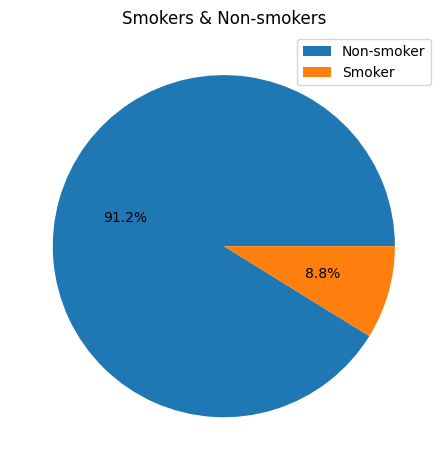

In [12]:
smoker = {"Non-smoker": 0, "Smoker": 1}

fig, ax = plt.subplots()

# create the pie chart from each smoker value (0, 1) in the dataset
plt.pie(x = [len(df[df["smoke"] == i]) for i in smoker.values()], autopct = lambda pct: f"{pct:.1f}%")

# map the labels to the pie chart
plt.legend(smoker.keys())

# set the title
ax.set(title = "Smokers & Non-smokers")

plt.tight_layout()

## 1.1 e)

&nbsp; Q: What is the weight distribution of the dataset?

&nbsp; A: The histogram below shows that the dataset is primarily comprised of individuals with a weight between 50 and 100 kg. This distribution is important to consider when analyzing cardiovascular disease as weight is a significant risk factor.

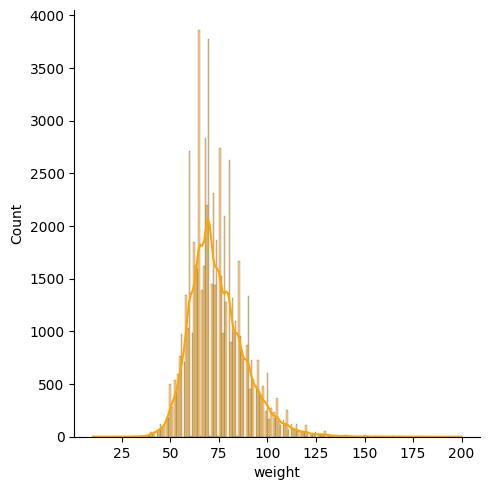

In [17]:
sns.displot(df["weight"], kde=True, color="orange") # kde = kernel density estimation (smooths the histogram)


## 1.1 f)

&nbsp; Q: What is the height distribution of the dataset?

&nbsp; A: The histogram below shows that the dataset is primarily comprised of individuals with a height between 150 and 180 cm.

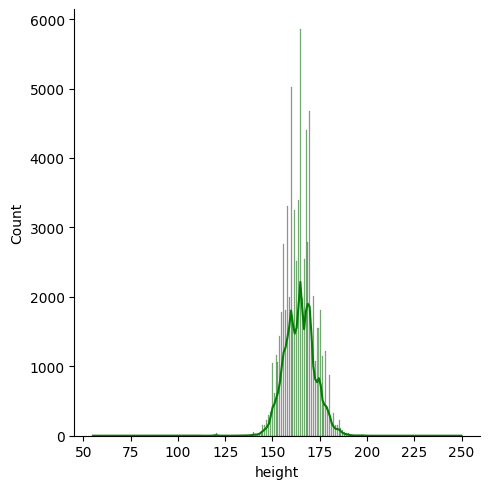

In [18]:
sns.displot(df["height"], kde=True, color="green")

## 1.1 g)

&nbsp; Q: What is the ratio of women vs men with positive cardiovascular disease?

&nbsp; A: 

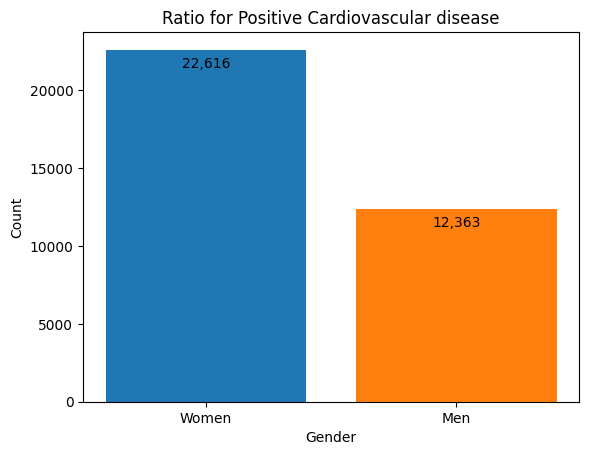

In [35]:
genders = {"Women": 1, "Men": 2}

fig, ax = plt.subplots()

# loop through the genders and plot the count of positive cardiovascular disease
for i in genders: # filtering gender = gender and cardio = True ie. 1
    filter = len(df[(df["gender"] == genders[i]) & (df["cardio"] == 1)])
    plt.bar(x = i, height = filter)
    
# format the bar chart
for p in ax.containers:
    ax.bar_label(p, labels = [f"{val:,.0f}" for val in p.datavalues], padding = -15)
    
ax.set(title = "Ratio for Positive Cardiovascular disease", xlabel = "Gender", ylabel = "Count");


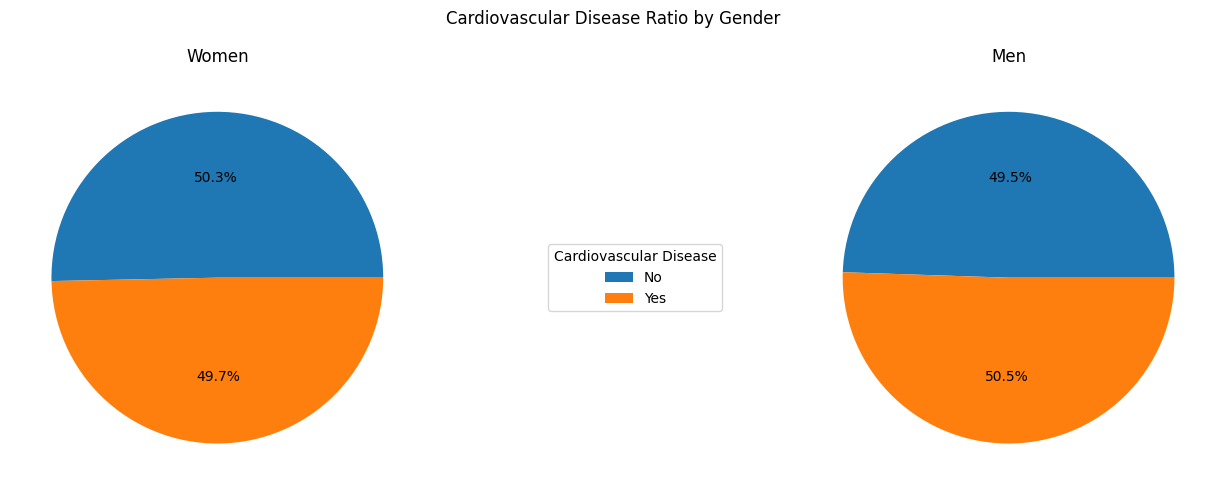

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# loop through gender and ax
for i, ax in zip(genders, ax.flatten()):
    total = len(df[df["gender"] == genders[i]]) # total count in dataset
    disease = len(df[(df["gender"] == genders[i]) & (df["cardio"] == 1)]) # total count w/ disease
    healthy = total - disease # total count w/o disease (both)
    
    # plot gender values in current ax
    ax.pie(x = [i for i in [healthy, disease]], autopct=lambda pct: f"{pct:.1f}%")
    ax.set_title(i) # gender key set as title
    
plt.legend(["No", "Yes"], title = "Cardiovascular Disease", bbox_to_anchor = (-0.4,0.5), loc = "center") # legend for both ax
plt.suptitle("Cardiovascular Disease Ratio by Gender")
plt.tight_layout()